In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'binary_img Image')

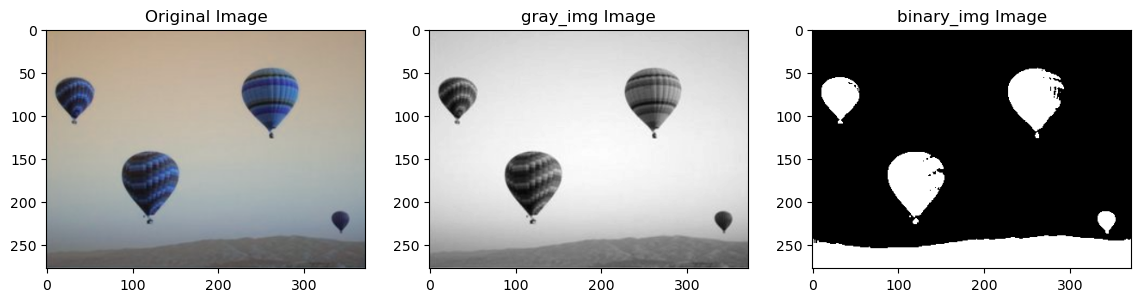

In [ ]:
img = cv2.imread('../data/images/balloon.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ , binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(14, 8))
plt.subplot(1, 3, 1);plt.imshow(img, cmap='gray');plt.title('Original Image') 
plt.subplot(1, 3, 2);plt.imshow(gray_img, cmap='gray');plt.title('gray_img Image')
plt.subplot(1,3,3);plt.imshow(binary_img, cmap='gray');plt.title('binary_img Image')  

Text(0.5, 1.0, 'gray_img Image')

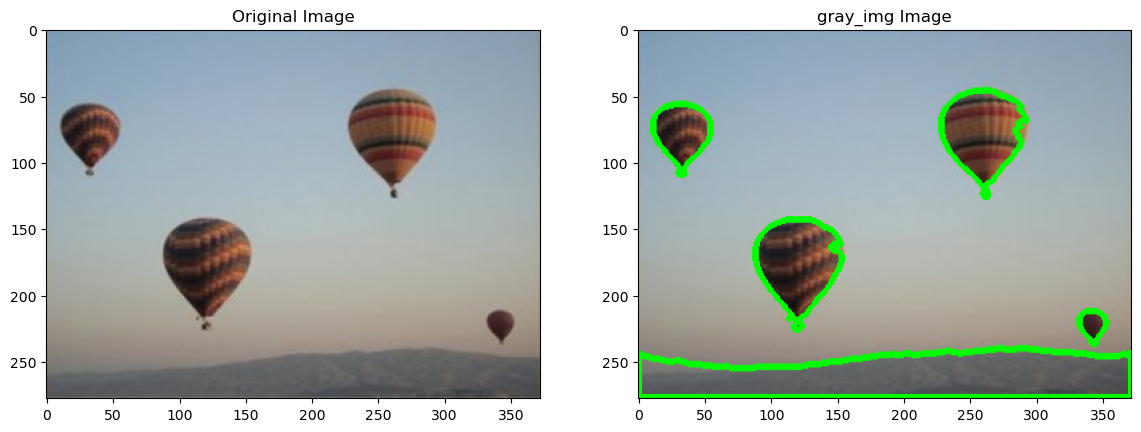

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5),(2,2))
closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

contors , _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_contors = cv2.drawContours(img.copy(), contors, -1, (0, 255, 0), 3)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1);plt.imshow(img[...,::-1], cmap='gray');plt.title('Original Image') 
plt.subplot(1, 2, 2);plt.imshow(all_contors[... , ::-1], cmap='gray');plt.title('gray_img Image')


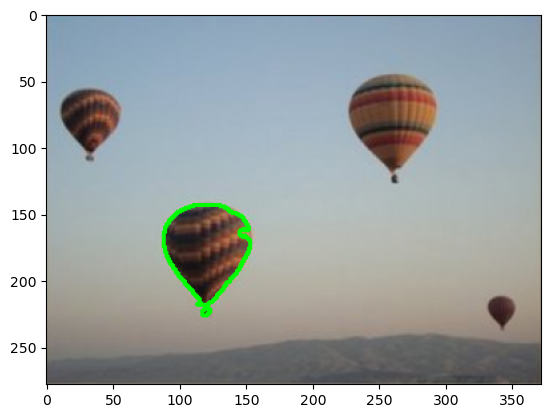

In [10]:
drawing = img.copy()
cv2.drawContours(drawing, [contors[2]], -1, (0, 255, 0), 2)
plt.imshow(drawing[... , ::-1])

In [11]:
bounded_rec = cv2.boundingRect(contors[2])
center , radius = cv2.minEnclosingCircle(contors[2])

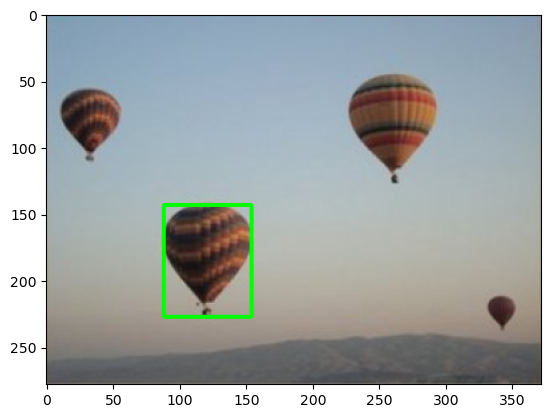

In [13]:
drawing = img.copy()
cv2.rectangle(drawing, (int(bounded_rec[0]), int(bounded_rec[1])),(int(bounded_rec[0])+int(bounded_rec[2]), int(bounded_rec[1])+int(bounded_rec[3])), (0, 255, 0), 2)
plt.imshow(drawing[... , ::-1])

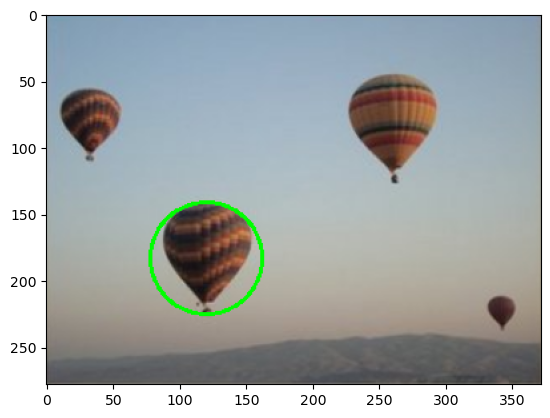

In [14]:
drawing = img.copy()

cv2.circle(drawing , (int (center[0]) , int(center[1])) , int(radius) , (0,255,0),2)

plt.imshow(drawing[... , ::-1])